In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

data = pd.read_csv("C:/Users/Alankrita Klement/Downloads/FOE.csv")
data
    

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...
10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [17]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10585,False,False,False,False,False,False,False
10586,False,False,False,False,False,False,False
10587,False,False,False,False,False,False,False
10588,False,False,False,False,False,False,False


In [18]:
data.Date = data.Date.fillna("zero")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...
10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#data["Date"]= data["Date"].str.replace('-','-').astype(float)
#data["Date"]=pd.to_numeric(data["Date"],errors = 'coerce')

inp_var = ["Open","High","Low","Close"]
target_var = ["Volume"]

X=data[inp_var].values
y=data[target_var].values
test_split_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_split_size,random_state =42)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train.ravel())
lr_model_predict = lr_model.predict(X_test)

print("Predicted_values:",(lr_model_predict))

Predicted_values: [148475.79395327 196251.80678423 264168.17937691 ... 335531.17591487
 159810.82907376 331833.86086331]


In [20]:
print(lr_model.intercept_)

744812.787741462


In [21]:
print(lr_model.coef_)

[ 100985.43578593  439625.77897593 -695418.99533188  118683.34260577]


In [22]:
from sklearn import metrics

print("Mean Absolute error:",metrics.mean_absolute_error(y_test,lr_model_predict))
print("Mean Squared error:",metrics.mean_squared_error(y_test,lr_model_predict))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(y_test,lr_model_predict)))

Mean Absolute error: 268785.75701540126
Mean Squared error: 395471189640.2784
Root Mean Squared error: 628865.0011252641


In [23]:
data.reset_index()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...,...
10585,10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [24]:
#plt.scatter(data.reset_index().iloc[[0]],y_test.ravel())

In [25]:
data.reset_index()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...,...
10585,10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [26]:
print(y_test)

[[504900]
 [ 29400]
 [103950]
 ...
 [244650]
 [171600]
 [ 43875]]


In [27]:
df = pd.DataFrame(y_test)
writer = pd.ExcelWriter("C:/Users/Alankrita Klement/Desktop/Demo.xlsx" , engine = 'xlsxwriter')
df.to_excel(writer,sheet_name = 'Sheet1', index=False)
writer.save()

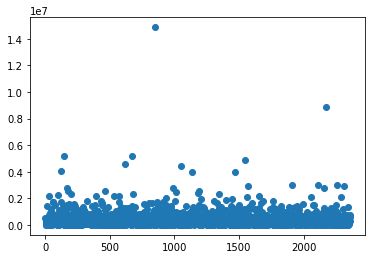

In [28]:
df1 = pd.read_csv("C:/Users/Alankrita Klement/Desktop/Demo.csv" )


plt.scatter(df1["Index"],df1["y_test"])

In [29]:
df = pd.DataFrame(lr_model_predict)
writer = pd.ExcelWriter("C:/Users/Alankrita Klement/Desktop/Demo.xlsx" , engine = 'xlsxwriter')
df.to_excel(writer,sheet_name = 'Sheet1', index=False)
writer.save()

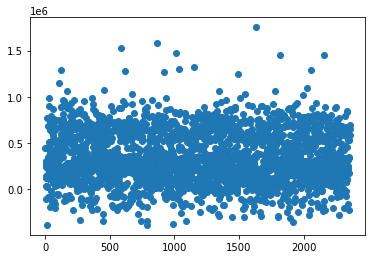

In [30]:
df1 = pd.read_csv("C:/Users/Alankrita Klement/Desktop/Demo1.csv" )


plt.scatter(df1["Index"],df1["lr_model_predict"])